In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [31]:
# Read in Scaden data
scaden = pd.read_csv('scaden/scaden_predictions.txt', sep='\t')
# Create clean df w/ new malignant type column
scaden = scaden.rename(columns={'Unnamed: 0': 'sample'})
scaden['sample'] = [re.sub(r'^.*?_G', 'G', sample) for sample in scaden['sample']]
scaden['tumorType'] = ['Prim.' if 'Prim.' in t else 'Rec.' for t in scaden['sample']]
scaden['sample'] = [sample.split('_')[0] for sample in scaden['sample']]

scaden.head()

,sample,MESlike,OPClike,AClike,NPClike,tumorType
0,GBM23,0.453784,0.267809,0.140957,0.137450,Prim.
1,GBM18,0.656607,0.119767,0.205593,0.018034,Prim.
2,GBM22,0.736406,0.110060,0.139434,0.014101,Prim.
3,GBM17,0.247800,0.164172,0.414031,0.173997,Prim.
4,GBM2,0.765984,0.053747,0.124312,0.055957,Prim.


In [2]:
# Read in Cibersortx data
cibersort = pd.read_csv("cibersort/cibersortx_output.txt", sep='\t')
# Create clean df w/ new malignant type column
cibersort = cibersort.rename(columns={'Mixture': 'sample'})
cibersort['sample'] = [re.sub(r'^.*?_G', 'G', sample) for sample in cibersort['sample']]
cibersort['tumorType'] = ['Prim.' if 'Prim.' in t else 'Rec.' for t in cibersort['sample']]
cibersort['sample'] = [sample.split('_')[0] for sample in cibersort['sample']]
cibersort.head()

,sample,AClike,MESlike,NPClike,OPClike,P-value,Correlation,RMSE,tumorType
0,GBM23,0.020422,0.768873,0.039120,0.171585,0,0.886447,0.707751,Prim.
1,GBM18,0.027894,0.843634,0.000310,0.128162,0,0.892386,0.806902,Prim.
2,GBM22,0.000000,0.882449,0.000000,0.117551,0,0.930879,0.786378,Prim.
3,GBM17,0.460514,0.343179,0.042155,0.154152,0,0.451955,0.944320,Prim.
4,GBM2,0.000000,0.873567,0.029961,0.096472,0,0.929950,0.773679,Prim.


In [68]:
# Create df for violin plot
scaden_violin = pd.DataFrame(np.array([np.repeat(ct, len(scaden.index)) for ct in ['MESlike','OPClike','AClike','NPClike']]).flatten(), columns=['cellType'])
scaden_violin['cellComposition'] = np.array([scaden['MESlike'], scaden['OPClike'], scaden['AClike'], scaden['NPClike']]).flatten()
scaden_violin['Tumor type'] = np.array(np.repeat(scaden['tumorType'],4)).flatten()
scaden_violin.head()

,cellType,cellComposition,Tumor type
0,MESlike,0.453784,Prim.
1,MESlike,0.656607,Prim.
2,MESlike,0.736406,Prim.
3,MESlike,0.247800,Prim.
4,MESlike,0.765984,Prim.


In [3]:
#Create df for violin plot
cibersort_violin = pd.DataFrame(np.array([np.repeat(ct, len(cibersort.index)) for ct in ['MESlike','OPClike','AClike','NPClike']]).flatten(), columns=['cellType'])
cibersort_violin['cellComposition'] = np.array([cibersort['MESlike'], cibersort['OPClike'], cibersort['AClike'], cibersort['NPClike']]).flatten()
cibersort_violin['Tumor type'] = np.array(np.repeat(cibersort['tumorType'],4)).flatten()
cibersort_violin.head()

,cellType,cellComposition,Tumor type
0,MESlike,0.768873,Prim.
1,MESlike,0.843634,Prim.
2,MESlike,0.882449,Prim.
3,MESlike,0.343179,Prim.
4,MESlike,0.873567,Prim.


NameError: name 'scaden_violin' is not defined

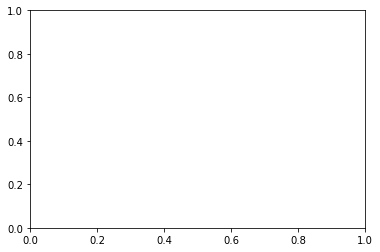

In [4]:
# Create Scaden Violinplot
fig, axes = plt.subplots()
sns.violinplot(x='cellType',y='cellComposition', hue='Tumor type', data=scaden_violin, ax = axes, split=True, palette="Set2")
plt.xlabel('')
plt.ylabel('Cell composition')
plt.title('Cell composition distribution using Scaden');

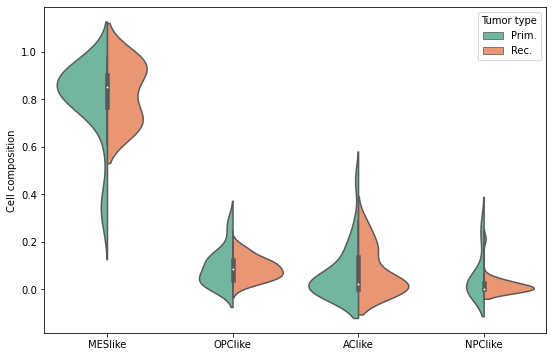

In [11]:
# Create Cibersort Violinplot
fig, axes = plt.subplots()
sns.violinplot(x='cellType',y='cellComposition', hue='Tumor type', data=cibersort_violin, ax = axes, split=True, palette="Set2")
plt.xlabel('')
plt.ylabel('Cell composition')
fig.set_size_inches(9, 6)
#plt.title('Cell composition distribution using CIBERSORTx');
plt.savefig('violin_cibersort_subtypes.jpeg')

<Figure size 432x288 with 0 Axes>